# Regresión Lineal Múltiple

### Autores
   * Steven Blandón

## Análisis del Problema
El comprar una casa es el deseo de muchas personas, y tenerlo a un precio justo es un deseo mayor. Existen varios factores que al final influiran en el precio a pagar.

Dichos factores inician desde la ubicación de la vivienda, años que tiene, cantidad de habitaciones, y no solo la cantidad de cuartos que tiene o el tamaño de la casa o propiedad, que es algo que se piensa comunmente, el conocer todas estás variables y analizarlas se puede predecir el valor de una casa. Y esto es de dicha importancia ya que se puede ir un paso adelante al momento de buscar relacionar precios y obtener una.

![Autos ROC](https://fotos.perfil.com/2020/08/12/la-demanda-mundial-de-automoviles-caeria-20-por-ciento-en-2020-1000662.jpg)

## Entendimiento de los Datos

Con el fin de analizar y tratar de estimar el precio a futuro de un vehiculo a partir de diferentes modelos de automóviles, se trabajó con un conjunto de datos que contiene 210 observaciones y 8 variables:

-Car_Name	
-Year	
-Selling_Price	
-Present_Price	
-Kms_Driven	
-Fuel_Type	
-Seller_Type	
-Transmission	
-Owner

In [ ]:
system("wget https://raw.githubusercontent.com/amankharwal/Website-data/master/car%20data.csv")

In [ ]:
install.packages("caTools")
install.packages("ggplot2")
install.packages("scatterplot3d")
install.packages("rgl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Exploración de los Datos

In [ ]:
#librerías utilizadas
library(caTools)
library(ggplot2)
#Evitar mostrar warning messages
options(warn=-1)

In [ ]:
#cargue el archivo a una variable que se llame autos usando la función read.table
cars <- read.csv('car data.csv', header = T, na.strings = '?')
cars$Seller_Type <- NULL
#Fuel_Type
cars$Fuel_Type[cars$Fuel_Type == "Petrol"] <- 0
cars$Fuel_Type[cars$Fuel_Type == "Diesel"] <- 1
cars$Fuel_Type[cars$Fuel_Type == "CNG"] <- 2
#Transmision
cars$Transmission[cars$Transmission == "Manual"] <- 0
cars$Transmission[cars$Transmission == "Automatic"] <- 1

In [ ]:
cars$Fuel_Type <- as.numeric(as.character(cars$Fuel_Type))
cars$Transmission <- as.numeric(as.character(cars$Transmission))

In [ ]:
cor(cars[,2:7])


Year          Selling_Price Present_Price Kms_Driven  Fuel_Type 
Year           1.0000000000 0.23614098    -0.04758421   -0.52434204 0.05364282
Selling_Price  0.2361409802 1.00000000     0.87898255    0.02918709 0.50946726
Present_Price -0.0475842097 0.87898255     1.00000000    0.20364703 0.44041534
Kms_Driven    -0.5243420407 0.02918709     0.20364703    1.00000000 0.16680064
Fuel_Type      0.0536428156 0.50946726     0.44041534    0.16680064 1.00000000
Transmission  -0.0003942236 0.36712763     0.34871472    0.16251006 0.08046641
              Transmission 
Year          -0.0003942236
Selling_Price  0.3671276333
Present_Price  0.3487147220
Kms_Driven     0.1625100610
Fuel_Type      0.0804664094
Transmission   1.0000000000

In [ ]:
#Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:
set.seed(1376)
splt <- sample.split(cars$Selling_Price, SplitRatio = 0.7)
cars.entrenamiento <- cars[splt, ]
cars.prueba <- cars[!splt, ]

str(cars.entrenamiento)
str(cars.prueba)


'data.frame':	210 obs. of  8 variables:
 $ Car_Name     : chr  "ritz" "sx4" "ciaz" "wagon r" ...
 $ Year         : int  2014 2013 2017 2011 2015 2015 2015 2015 2015 2009 ...
 $ Selling_Price: num  3.35 4.75 7.25 2.85 6.75 6.5 7.45 7.5 6.1 2.25 ...
 $ Present_Price: num  5.59 9.54 9.85 4.15 8.12 8.61 8.92 9.94 7.71 7.21 ...
 $ Kms_Driven   : int  27000 43000 6900 5200 18796 33429 42367 15000 26000 77427 ...
 $ Fuel_Type    : num  0 1 0 0 0 1 1 0 0 0 ...
 $ Transmission : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Owner        : int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	91 obs. of  8 variables:
 $ Car_Name     : chr  "swift" "vitara brezza" "ciaz" "alto 800" ...
 $ Year         : int  2014 2018 2016 2017 2015 2016 2015 2016 2011 2011 ...
 $ Selling_Price: num  4.6 9.25 8.75 2.85 6.85 7.75 3.25 2.85 4.4 2.35 ...
 $ Present_Price: num  6.87 9.83 8.89 3.6 10.38 ...
 $ Kms_Driven   : int  42450 2071 20273 2135 51000 43000 35500 25000 50000 54200 ...
 $ Fuel_Type    : num  1 1 1 0 1 1 2 0 0 0 ...
 $ Tr

In [ ]:
print(".................................Entrenamiento..................................")
summary(cars.entrenamiento)
print(".................................Pruebas........................................")
summary(cars.prueba)

[1] ".................................Entrenamiento.................................."


   Car_Name              Year      Selling_Price     Present_Price   
 Length:210         Min.   :2003   Min.   : 0.1200   Min.   : 0.470  
 Class :character   1st Qu.:2012   1st Qu.: 0.7625   1st Qu.: 1.200  
 Mode  :character   Median :2014   Median : 3.4950   Median : 5.940  
                    Mean   :2014   Mean   : 5.0150   Mean   : 8.012  
                    3rd Qu.:2016   3rd Qu.: 6.4375   3rd Qu.: 9.930  
                    Max.   :2017   Max.   :35.0000   Max.   :92.600  
   Kms_Driven       Fuel_Type      Transmission        Owner        
 Min.   :   500   Min.   :0.000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 15000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 30876   Median :0.000   Median :0.0000   Median :0.00000  
 Mean   : 37179   Mean   :0.219   Mean   :0.1429   Mean   :0.03333  
 3rd Qu.: 46474   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :500000   Max.   :2.000   Max.   :1.0000   Max.   :1.00000  

[1] ".................................Pruebas........................................"


   Car_Name              Year      Selling_Price    Present_Price   
 Length:91          Min.   :2005   Min.   : 0.100   Min.   : 0.320  
 Class :character   1st Qu.:2012   1st Qu.: 1.050   1st Qu.: 1.470  
 Mode  :character   Median :2014   Median : 3.650   Median : 6.760  
                    Mean   :2014   Mean   : 3.845   Mean   : 6.743  
                    3rd Qu.:2016   3rd Qu.: 5.625   3rd Qu.: 9.400  
                    Max.   :2018   Max.   :14.900   Max.   :30.610  
   Kms_Driven       Fuel_Type       Transmission        Owner        
 Min.   :   500   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 16251   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 34000   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   : 36412   Mean   :0.1978   Mean   :0.1099   Mean   :0.06593  
 3rd Qu.: 49500   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :142000   Max.   :2.0000   Max.   :1.0000   Max.   :3.00000  

De acuerdo con los resúmenes anteriores, hay algunas observaciones en el conjunto de datos de prueba cuyo rango de las variables Years,Selling_Price, Present_Price y Owner se extiende más allá del rango máximo y minimo en el conjunto de datos de entrenamiento, así que vamos a eliminar esas observaciones del conjunto de datos de prueba. Para que queden dentro del rango admitido en el entrenamiento.

In [ ]:
print("Eliminar datos fuera de rango")
cars.prueba <- cars.prueba[cars.prueba$Year <= 2017  & cars.prueba$Selling_Price >=0.1200 & cars.prueba$Present_Price >= 0.470 & cars.prueba$Owner <= 1.0, ]
print(".................................Entrenamiento..................................")
summary(cars.entrenamiento)
print(".................................Pruebas........................................")
summary(cars.prueba)

[1] "Eliminar datos fuera de rango"
[1] ".................................Entrenamiento.................................."


   Car_Name              Year      Selling_Price     Present_Price   
 Length:210         Min.   :2003   Min.   : 0.1200   Min.   : 0.470  
 Class :character   1st Qu.:2012   1st Qu.: 0.7625   1st Qu.: 1.200  
 Mode  :character   Median :2014   Median : 3.4950   Median : 5.940  
                    Mean   :2014   Mean   : 5.0150   Mean   : 8.012  
                    3rd Qu.:2016   3rd Qu.: 6.4375   3rd Qu.: 9.930  
                    Max.   :2017   Max.   :35.0000   Max.   :92.600  
   Kms_Driven       Fuel_Type      Transmission        Owner        
 Min.   :   500   Min.   :0.000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 15000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 30876   Median :0.000   Median :0.0000   Median :0.00000  
 Mean   : 37179   Mean   :0.219   Mean   :0.1429   Mean   :0.03333  
 3rd Qu.: 46474   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :500000   Max.   :2.000   Max.   :1.0000   Max.   :1.00000  

[1] ".................................Pruebas........................................"


   Car_Name              Year      Selling_Price    Present_Price   
 Length:87          Min.   :2005   Min.   : 0.200   Min.   : 0.510  
 Class :character   1st Qu.:2012   1st Qu.: 1.100   1st Qu.: 1.645  
 Mode  :character   Median :2014   Median : 3.750   Median : 6.760  
                    Mean   :2014   Mean   : 3.884   Mean   : 6.655  
                    3rd Qu.:2016   3rd Qu.: 5.625   3rd Qu.: 9.400  
                    Max.   :2017   Max.   :14.900   Max.   :30.610  
   Kms_Driven       Fuel_Type       Transmission        Owner        
 Min.   :   500   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 16251   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 33019   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   : 34968   Mean   :0.1954   Mean   :0.1034   Mean   :0.03448  
 3rd Qu.: 49000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :104707   Max.   :2.0000   Max.   :1.0000   Max.   :1.00000  

En total, se eliminaron 4 observaciones.

Comenzamos nuestra exploración creando gráficos de dispersión para ver cuál es la relación entre nuestra variable de interés (Selling_Price) y el resto de las variables cuantitativas:

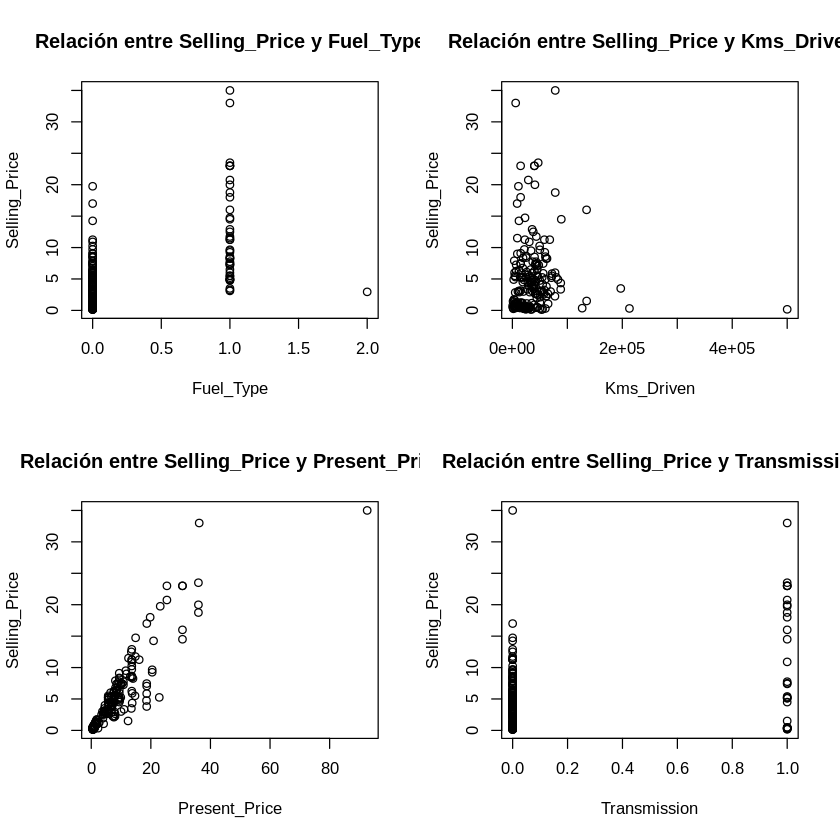

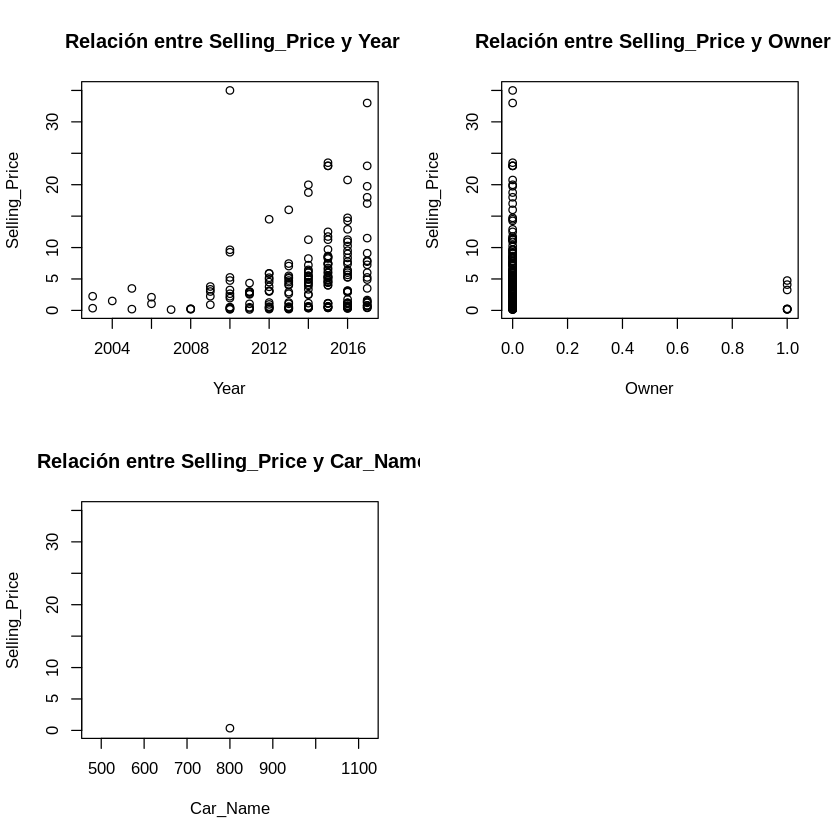

In [ ]:
par(mfrow = c(2,2)) #crear una cuadrícula de 2 columnas y 2 hileras para ver cuatro gráficos.

plot(x = cars.entrenamiento$Fuel_Type, y = cars.entrenamiento$Selling_Price, main = 'Relación entre Selling_Price y Fuel_Type', ylab = 'Selling_Price', xlab = 'Fuel_Type')
plot(x = cars.entrenamiento$Kms_Driven, y = cars.entrenamiento$Selling_Price, main = ' Relación entre Selling_Price y Kms_Driven', ylab = 'Selling_Price', xlab = 'Kms_Driven')
plot(x = cars.entrenamiento$Present_Price, y = cars.entrenamiento$Selling_Price, main = ' Relación entre Selling_Price y Present_Price', ylab = 'Selling_Price', xlab = 'Present_Price')
plot(x = cars.entrenamiento$Transmission, y = cars.entrenamiento$Selling_Price, main = ' Relación entre Selling_Price y Transmission', ylab = 'Selling_Price', xlab = 'Transmission')
plot(x = cars.entrenamiento$Year, y = cars.entrenamiento$Selling_Price, main = ' Relación entre Selling_Price y Year', ylab = 'Selling_Price', xlab = 'Year')

plot(x = cars.entrenamiento$Owner, y = cars.entrenamiento$Selling_Price, main = ' Relación entre Selling_Price y Owner', ylab = 'Selling_Price', xlab = 'Owner')
plot(x = cars.entrenamiento$Car_Name, y = cars.entrenamiento$Selling_Price, main = ' Relación entre Selling_Price y Car_Name', ylab = 'Selling_Price', xlab = 'Car_Name')

En los gráficos creados anteriormente, podemos ver como si existe algún tipo de relación, aunque no sea exactamente lineal, entre Selling_price y  Present_price.


También es importante visualizar la relación entre las diferentes variables predictoras, para lo cual podemos crear una matriz de gráficos de dispersión:

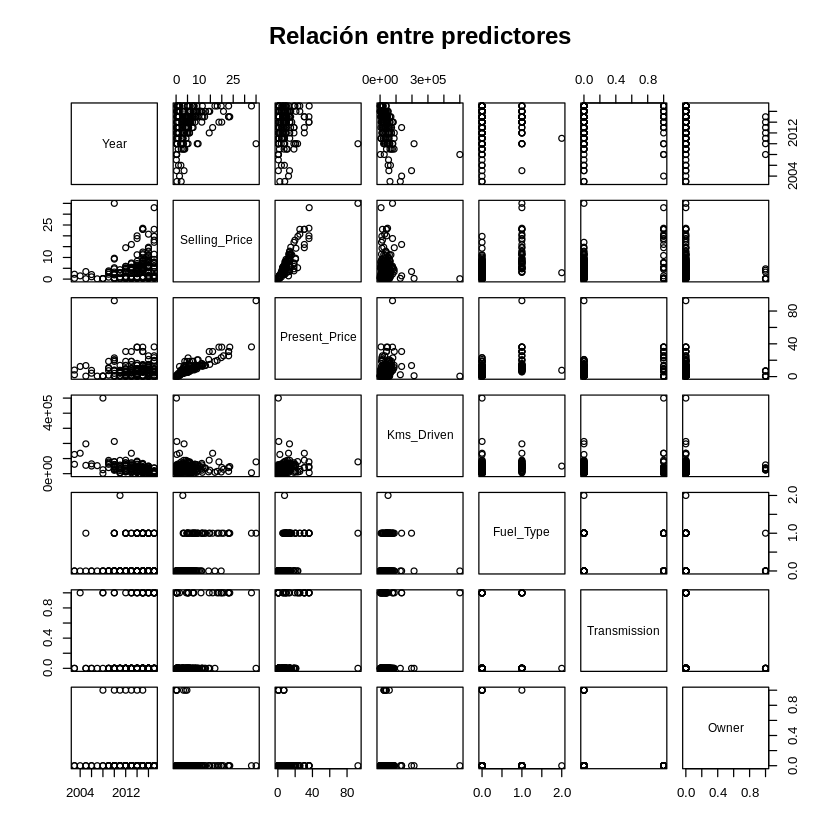

In [ ]:
par(mfrow = c(1,1)) #volver a solo un gráfico por visualización.

pairs(cars.entrenamiento[c(2,3,4,5,6,7,8)], main = 'Relación entre predictores')

La información del gráfico anterior podemos complementarla con una matriz de correlación:

In [ ]:
cor(cars.entrenamiento[c(2,3,4,5,6,7,8)])

Year        Selling_Price Present_Price Kms_Driven  Fuel_Type  
Year           1.00000000  0.24062914   -0.00835778   -0.49009511  0.04270950
Selling_Price  0.24062914  1.00000000    0.89388869    0.02765637  0.57101956
Present_Price -0.00835778  0.89388869    1.00000000    0.16299279  0.50407463
Kms_Driven    -0.49009511  0.02765637    0.16299279    1.00000000  0.17322907
Fuel_Type      0.04270950  0.57101956    0.50407463    0.17322907  1.00000000
Transmission   0.06052691  0.39489136    0.32368471    0.14250069  0.14181444
Owner         -0.11816762 -0.10300327   -0.09031331   -0.01033082 -0.03329319
              Transmission Owner      
Year           0.06052691  -0.11816762
Selling_Price  0.39489136  -0.10300327
Present_Price  0.32368471  -0.09031331
Kms_Driven     0.14250069  -0.01033082
Fuel_Type      0.14181444  -0.03329319
Transmission   1.00000000  -0.07580980
Owner         -0.07580980   1.00000000

Como pudimos apreciar en la matriz de gráficos de dispersión, y confirmar con la matriz de correlación, hay una correlación significativa entre las variables Selling_price con (Present_price,Fuel_type,Transmission) y viceversa. Debemos escoger una variable entre Present_price,Fuel_type,Transmission, para lo cual podemos crear una matriz de correlación entre esas cinco variables y median_house_value para ver cuál tiene una correlación mayor con Selling_price:

In [ ]:
cor(cars.entrenamiento[c(4,6,7,3)])

Present_Price Fuel_Type Transmission Selling_Price
Present_Price 1.0000000     0.5040746 0.3236847    0.8938887    
Fuel_Type     0.5040746     1.0000000 0.1418144    0.5710196    
Transmission  0.3236847     0.1418144 1.0000000    0.3948914    
Selling_Price 0.8938887     0.5710196 0.3948914    1.0000000

Basándonos en la correlación absoluta, se va a escoger las variables Present_price,Fuel_type para ser incluida en el modelo.

## Modelo de Minería de Datos

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [ ]:
reg.Selling_Price <- lm(Selling_Price ~ Present_Price+Fuel_Type, data = cars.entrenamiento)
summary(reg.Selling_Price)


Call:
lm(formula = Selling_Price ~ Present_Price + Fuel_Type, data = cars.entrenamiento)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4751  -0.7201  -0.3676   0.8376  12.6899 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.67791    0.22100   3.068  0.00245 ** 
Present_Price  0.48191    0.02034  23.697  < 2e-16 ***
Fuel_Type      2.17278    0.46141   4.709 4.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.454 on 207 degrees of freedom
Multiple R-squared:  0.8185,	Adjusted R-squared:  0.8167 
F-statistic: 466.7 on 2 and 207 DF,  p-value: < 2.2e-16


## Evaluación

Se realiza una evaluación de los residuos de la regresión lineal.

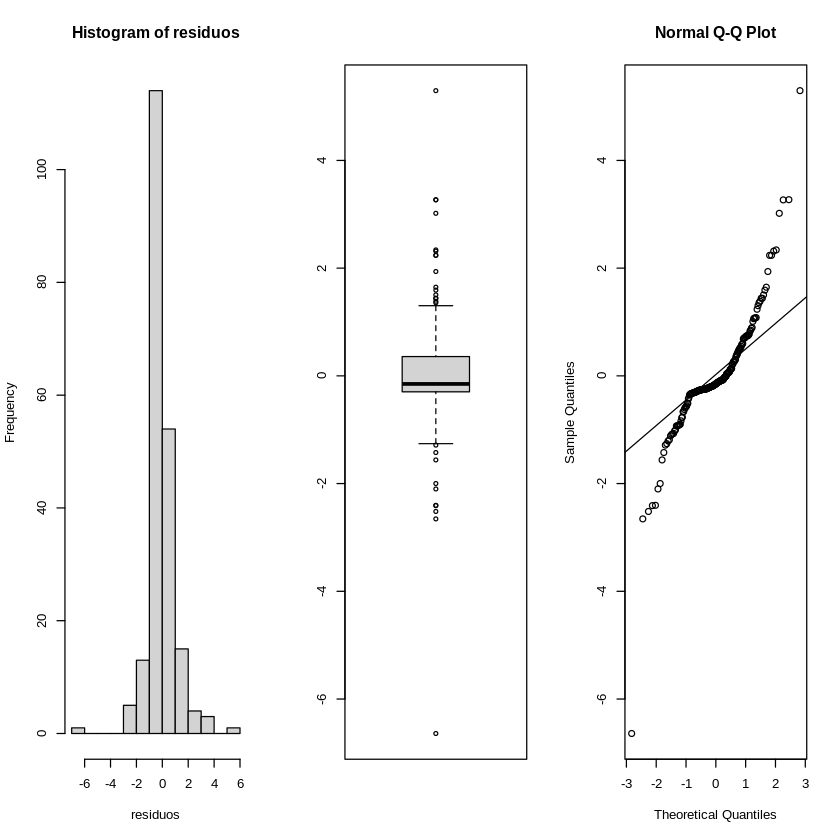

In [ ]:
residuos<-rstandard(reg.Selling_Price) # residuos estándares del modelo ajustado (completo) 
par(mfrow=c(1,3)) # divide la ventana en una fila y tres columnas 
hist(residuos) # histograma de los residuos estandarizados 
boxplot(residuos) # diagrama de cajas de los residuos estandarizados 
qqnorm(residuos) # gráfico de cuantiles de los residuos estandarizados 
qqline(residuos)  
par(mfrow=c(1,1)) # devuelve la pantalla a su estado original

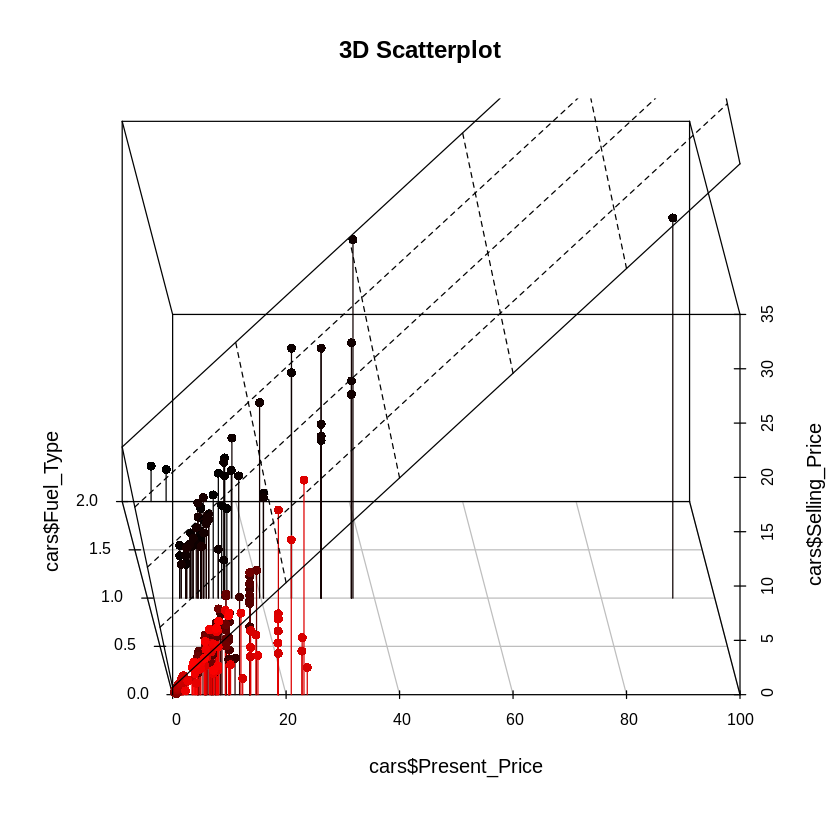

In [ ]:
library("scatterplot3d")
library("rgl")
s3d<-scatterplot3d(cars$Present_Price, cars$Fuel_Type,cars$Selling_Price,  pch=16, highlight.3d = TRUE, type="h",main="3D Scatterplot", angle = 100)
s3d$plane3d(reg.Selling_Price, lty.box = "solid")


Obtenemos los valores de predicción del modelo actual

In [ ]:
cars.prueba$Prediccion <- predict(reg.Selling_Price, newdata = cars.prueba)
str(cars.prueba)

cars1<-cars.prueba[cars.prueba$Selling_Price>=cars.prueba$Prediccion,]
cars1

cars2<-cars.prueba[cars.prueba$Selling_Price<=cars.prueba$Prediccion,]
str(cars2)

'data.frame':	87 obs. of  9 variables:
 $ Car_Name     : chr  "swift" "ciaz" "alto 800" "ciaz" ...
 $ Year         : int  2014 2016 2017 2015 2016 2015 2016 2011 2011 2014 ...
 $ Selling_Price: num  4.6 8.75 2.85 6.85 7.75 3.25 2.85 4.4 2.35 6 ...
 $ Present_Price: num  6.87 8.89 3.6 10.38 10.79 ...
 $ Kms_Driven   : int  42450 20273 2135 51000 43000 35500 25000 50000 54200 45000 ...
 $ Fuel_Type    : num  1 1 0 1 1 2 0 0 0 1 ...
 $ Transmission : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Owner        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Prediccion   : num  6.16 7.13 2.41 7.85 8.05 ...


Car_Name           Year Selling_Price Present_Price Kms_Driven Fuel_Type
9   ciaz               2016  8.75          8.89         20273      1        
11  alto 800           2017  2.85          3.60          2135      0        
21  alto k10           2016  2.85          3.95         25000      0        
37  dzire              2015  4.65          7.20         48767      0        
41  baleno             2016  5.85          7.87         24524      0        
46  ciaz               2014  7.50         12.04         15000      0        
49  ertiga             2015  5.80          7.71         25870      0        
90  etios g            2014  4.75          6.76         40000      0        
102 UM Renegade Mojave 2017  1.70          1.82          1400      0        
204 i10                2011  2.95          4.60         53460      0        
206 grand i10          2016  5.25          5.70          3493      0        
207 xcent              2017  5.75          7.13         12479      0        
232 verna              2017  9.25          9.40         15001      0        
233 elantra            2015 11.45         14.79         12900      0        
261 city               2016  9.15         13.60         29223      0        
262 brio               2016  5.50          5.97          5600      0        
264 jazz               2016  6.60          7.70         16002      0        
266 jazz               2017  6.50          8.70         21200      0        
269 brio               2017  4.80          5.80         19000      0        
270 city               2015  6.70         10.00         18828      0        
273 city               2015  7.50         10.00         27600      0        
288 amaze              2015  5.75          7.50         44000      0        
289 city               2015  8.40         13.60         34000      0        
290 city               2016 10.11         13.60         10980      0        
292 brio               2015  5.40          6.10         31427      0        
298 brio               2015  4.00          5.90         60000      0        
    Transmission Owner Prediccion
9   0            0     7.134832  
11  0            0     2.412773  
21  0            0     2.581440  
37  0            0     4.147631  
41  1            0     4.470508  
46  1            0     6.480052  
49  0            0     4.393403  
90  0            0     3.935593  
102 0            0     1.554982  
204 0            0     2.894678  
206 0            1     3.424774  
207 0            0     4.113898  
232 0            0     5.207822  
233 1            0     7.805290  
261 0            0     7.231823  
262 0            0     3.554888  
264 0            0     4.388584  
266 0            0     4.870489  
269 0            0     3.472964  
270 0            0     5.496965  
273 0            0     5.496965  
288 1            0     4.292203  
289 0            0     7.231823  
290 0            0     7.231823  
292 0            0     3.617536  
298 0            0     3.521155

'data.frame':	61 obs. of  9 variables:
 $ Car_Name     : chr  "swift" "ciaz" "ertiga" "wagon r" ...
 $ Year         : int  2014 2015 2016 2015 2011 2011 2014 2008 2012 2005 ...
 $ Selling_Price: num  4.6 6.85 7.75 3.25 4.4 2.35 6 1.95 14.9 2.75 ...
 $ Present_Price: num  6.87 10.38 10.79 5.09 8.01 ...
 $ Kms_Driven   : int  42450 51000 43000 35500 50000 54200 45000 58000 104707 90000 ...
 $ Fuel_Type    : num  1 1 1 2 0 0 1 0 1 0 ...
 $ Transmission : num  0 0 0 0 1 0 0 0 1 0 ...
 $ Owner        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Prediccion   : num  6.16 7.85 8.05 7.48 4.54 ...


In [ ]:
length(cars.prueba$Prediccion)
length(cars.prueba$Selling_Price)

[1] 87

[1] 87

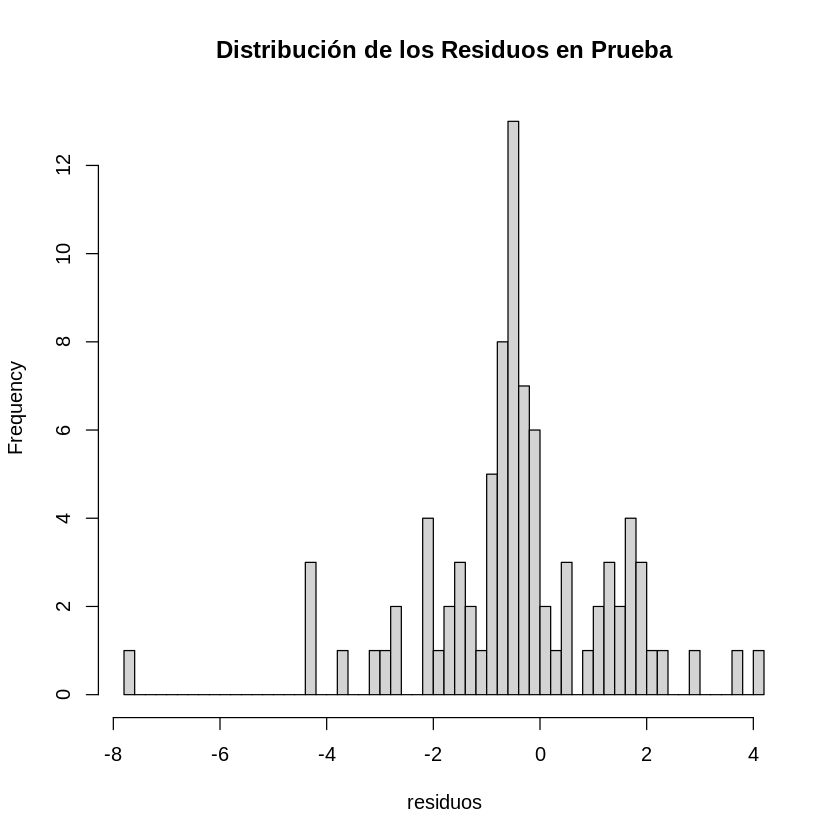

In [ ]:
hist(cars.prueba$Selling_Price - cars.prueba$Prediccion, 
     breaks = 50,
     main = 'Distribución de los Residuos en Prueba',
     xlab = 'residuos')


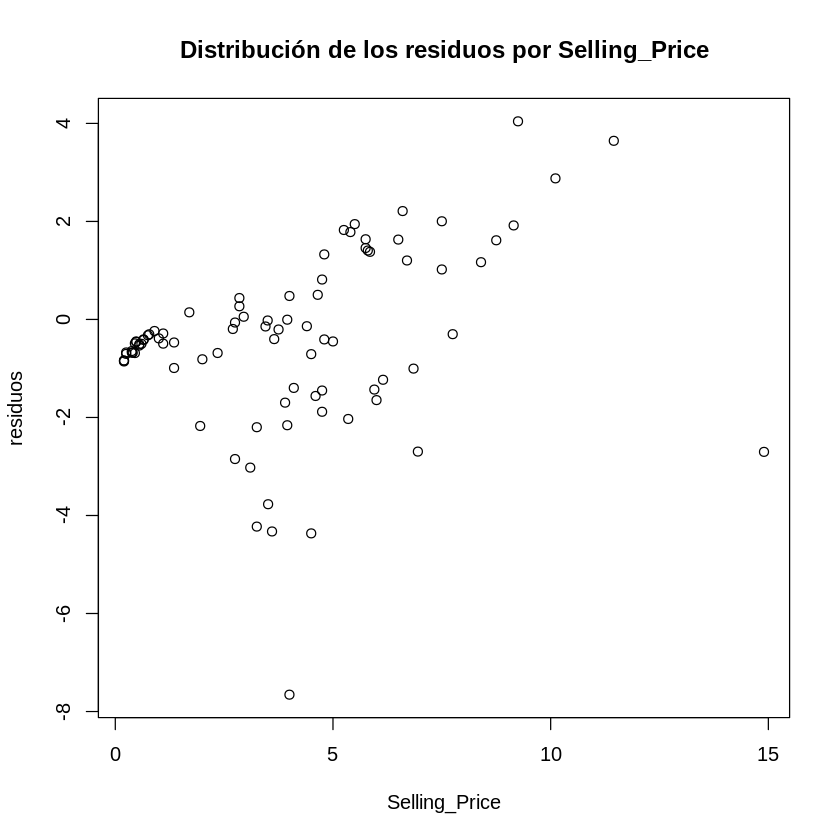

In [ ]:
plot(y = cars.prueba$Selling_Price - cars.prueba$Prediccion,
     x = cars.prueba$Selling_Price,
     main = 'Distribución de los residuos por Selling_Price',
     xlab = 'Selling_Price',
     ylab = 'residuos')

In [ ]:
reg.Selling_Price


Call:
lm(formula = Selling_Price ~ Present_Price + Fuel_Type, data = cars.entrenamiento)

Coefficients:
  (Intercept)  Present_Price      Fuel_Type  
       0.6779         0.4819         2.1728  


In [ ]:
example = c(5.97,0) 
my_list <- list(Present_Price=6.97,Fuel_Type=0)
my_list
#predict_value2 <- predict(reg.Selling_Price, data.frame(Present_Price = c(5.97),Fuel_Type= c(0)))
predict_value2 <- predict(reg.Selling_Price, my_list)
predict_value2


$Present_Price
[1] 6.97

$Fuel_Type
[1] 0

1 
4.036793

## Resultados
El modelo es aceptable porque predice el 84% del valor de un automovil. Por lo general ya se vuelve un modelo aceptable después de un 80%, por lo que si se desea tener un mayor acierto se necesitarian más datos, de igual forma se puede predecir, pero con un rango de fallo un poco elevado.

In [ ]:
install.packages('e1071', dependencies=TRUE)

In [ ]:

library(e1071)
attach(iris)

MODEL_SAVE_PATH = "model"
DEP_LIBS = c("caTools","ggplot2","scatterplot3d","rgl")

x <- subset(iris, select=-Species)
y <- Species


# save
model_rds_path = paste(MODEL_SAVE_PATH, ".rds",sep='')
model_dep_path = paste(MODEL_SAVE_PATH, ".dep",sep='')

# save model
saveRDS(reg.Selling_Price, model_rds_path)

# save dependency list
file_conn <- file(model_dep_path)
writeLines(DEP_LIBS, file_conn)
close(file_conn)

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 5):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 6):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 7):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 8):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 9):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 11):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


